In [ ]:
#import libraries
'''
We strongly recommend to either install everything from the defaults channel,
or everything from the conda-forge channel. Ending up with a mixture of packages
from both channels for the dependencies of GeoPandas can lead to import problems.
See the conda-forge section on using multiple channels for more details.
GeoPandas and all its dependencies are available on the conda-forge channel, and can be installed as:
conda install --channel conda-forge geopandas
'''
import requests
from datetime import datetime as dt
from datetime import timedelta
import pandas as pd
#import geos
#import ipyleaflet

In [2]:
#import geopandas
'''
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
                        LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
                        MarkerCluster, Heatmap,SearchControl, FullScreenControl)
                    '''


'\nfrom ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,\n                        LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,\n                        MarkerCluster, Heatmap,SearchControl, FullScreenControl)\n                    '

In [3]:
# get events from n days ago
iso = 562 #Look in ACLED documentation ISO code for number this is for Niger
limit = 400

#api_url = 'https://api.acleddata.com/acled/read?terms=accept&iso={}'.format(iso)
api_url = 'https://api.acleddata.com/acled/read?key=PH-oxHF9EF8IavXOxd9v&email=alexzzlin@gmail.com&iso={0}&limit={1}'.format(iso,limit)

print (api_url, type(api_url)) #creates request according to ACLED format specifications - p. 13

https://api.acleddata.com/acled/read?key=PH-oxHF9EF8IavXOxd9v&email=alexzzlin@gmail.com&iso=562&limit=400 <class 'str'>


In [4]:
response = requests.get(api_url)
data = response.json()
data.keys()
data['count'] 

0

In [5]:
#response.headers
data.keys()
data

{'status': 403,
 'success': False,
 'count': 0,
 'error': {'status': 403,
  'message': 'You have reached your download limit for the year. To download more ACLED data, you can either wait until the start of your yearly cycle (one year from the date you registered) or reach out to the ACLED Access team (access@acleddata.com) to discuss other options.'}}

IpyLeaflet: Interactive mapping in Jupyter notebook
URL: https://towardsdatascience.com/ipyleaflet-interactive-mapping-in-jupyter-notebook-994f19611e79
A beginner’s guide on interactive Geospatial Data visualization with IpyLeaflet.

If you have JupyterLab, you will also need to install the JupyterLab extension:

jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet

The code of this tutorial is available in this Github Repository:
shakasom/IpyLeaflet-jupyter

Contribute to shakasom/IpyLeaflet-jupyter development by creating an account on GitHub.

### From the documentation we know this is the max return --- How can we get all the results?

In [6]:
# Let's mkae a function that updates our search to get the new pages

def ping_acled(api_url): 
    '''
    Takes one parameter search term for API
    '''
    
    response = requests.get(api_url)
    data = response.json()
    return data
    

In [7]:

results = [] # empty data strcture to store results
num_results = 500 # condition to continue adding pages
count = 0  # tracker of results
page = 1 #Per the documentation each page will give us more results
'''
while num_results == 500: #if less 500 or 0 we know we have all the results
    print ("starting ", page, " ", num_results) #just to see our progress
    api_url = 'https://api.acleddata.com/acled/read?terms=accept&iso={}&page={}'.format(iso,page) #the search
    data = ping_acled(api_url) #call the previous function 
    results.append(data['data']) #store in our results
    count += data['count'] #Track number of results
    num_results = data['count'] #update our condition
    page += 1 #update our page variable
    print ("Total Results ", count) #Track our progress
'''

'\nwhile num_results == 500: #if less 500 or 0 we know we have all the results\n    print ("starting ", page, " ", num_results) #just to see our progress\n    api_url = \'https://api.acleddata.com/acled/read?terms=accept&iso={}&page={}\'.format(iso,page) #the search\n    data = ping_acled(api_url) #call the previous function \n    results.append(data[\'data\']) #store in our results\n    count += data[\'count\'] #Track number of results\n    num_results = data[\'count\'] #update our condition\n    page += 1 #update our page variable\n    print ("Total Results ", count) #Track our progress\n'

In [8]:
#Now I want to put them together into one giant result
'''
super_list = []
for res in results: 
    super_list += res
    print (len(super_list))
'''

'\nsuper_list = []\nfor res in results: \n    super_list += res\n    print (len(super_list))\n'

In [9]:
df = pd.read_csv('combined_acled_datasets.csv')
remover_value = len(df) * 0.8

na_list = df.isna().sum().to_dict()
for key in na_list:
    if na_list[key] > remover_value:
        df.drop(key, inplace = True, axis = 1)

df.reset_index(drop=True, inplace=True)

C:\Users\Alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df[:2]

,data_id,iso3,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,1,48,48,BHR324,324,01-January-2016,2016,1,Protests,Peaceful protest,...,NaN,Al Maamir,26.133,50.609,1,Press TV,Regional,Small protest have been held in the village of...,0,1572403770
1,2,48,48,BHR328,328,01-January-2016,2016,1,Protests,Excessive force against protesters,...,NaN,Ash Shakhurah,26.215,50.507,1,Middle East Eye,International,Bahrainis took part in an anti-regime protest ...,0,1615250536


In [12]:
#convert it into an pandas data frame or just use your data structure and do more stuff
#niger_res = pd.DataFrame(super_list)
niger_res = df[df['iso']==562]
niger_res.head()

,data_id,iso3,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
343519,343520,562,562,NIR1,1,06-January-1997,1997,1,Violence against civilians,Attack,...,Lamorde,Niamey,13.52,2.12,1,Reuters,International,A french woman was shot and killed by Tuareg r...,1,1582579226
343520,343521,562,562,NIR2,2,11-January-1997,1997,1,Riots,Violent demonstration,...,Diffa,Diffa,13.32,12.61,1,Reuters,International,Protests calling for pro-democracy turned viol...,0,1600121129
343521,343522,562,562,NIR3,3,11-January-1997,1997,1,Riots,Violent demonstration,...,Lamorde,Niamey,13.52,2.12,1,Reuters,International,Protests calling for pro-democracy turned viol...,0,1600121129
343522,343523,562,562,NIR4,4,18-January-1997,1997,1,Protests,Peaceful protest,...,Lamorde,Niamey,13.52,2.12,1,Reuters,International,Opposition supporters protested the arrest of ...,0,1582579226
343523,343524,562,562,NIR5,5,19-January-1997,1997,1,Battles,Armed clash,...,Bilma,Madama,21.94,13.64,1,All Africa,Regional,Clashes broke out between armed bandits and Ni...,14,1582579226


### Do the right thing, take some time to look at the codebook and see what these columns are

In [13]:
niger_res.columns

Index(['data_id', 'iso3', 'iso', 'event_id_cnty', 'event_id_no_cnty',
       'event_date', 'year', 'time_precision', 'event_type', 'sub_event_type',
       'actor1', 'assoc_actor_1', 'inter1', 'actor2', 'inter2', 'interaction',
       'region', 'country', 'admin1', 'admin2', 'admin3', 'location',
       'latitude', 'longitude', 'geo_precision', 'source', 'source_scale',
       'notes', 'fatalities', 'timestamp'],
      dtype='object')

### Homework --- Make a map of some ACLED Data (absolutely use the code from the Global Terrorism Database exercise)

In [14]:
#import geopandas
import pandas as pd #pandas places ones data in tables format
from bokeh.plotting import figure, output_notebook, show #builds interactive graphs for python
from bokeh.models import Range1d
import math #this is used in graphic section to use the irrational number pi
output_notebook() #Allows inline plotting for Juptyer notebook

Loading BokehJS ...

In [15]:
#Imports necessary aspects of Bokeh for plotting on a map
from bokeh.tile_providers import get_provider, Vendors
from pyproj import Transformer
tile_provider = get_provider('STAMEN_TERRAIN')
#create pyproj transformer to convert form lat/long to web mercator
transformer = Transformer.from_crs('epsg:4326','epsg:3857')

In [16]:
map_dict = {} # empty dictionary to track group attacks by lat long
nan_count = {} # some data doesn't have a lat/long so we need to know what we are losing

# Iterate through tables and associate group with lat/long
for idx, row in niger_res.iterrows():    
    if row['event_type'] in map_dict.keys(): 
        if math.isnan(row["latitude"]):
            #This counts no data
            if row['event_type'] in nan_count.keys(): 
                nan_count[row['event_type']] += 1 
            else: 
                nan_count[row['event_type']] = 1
        else: 
            #This has to convert the lat/long to a mercator projection 
            point = transformer.transform(row["latitude"],row["longitude"])
            map_dict[row['event_type']].append([point[0],point[1]]) 
    #BOTH the if an else statement do the same thing but since it is a dictionary one needs to add the group name first
    else:  
        if math.isnan(row["latitude"]):
            nan_count[row['event_type']] = 1
        else: 
            point = transformer.transform(row["latitude"],row["longitude"])
            map_dict[row['event_type']] =[[point[0],point[1]]]
        
#This tells how many attacks we are losing

nan_count

{}

In [17]:
map_dict #.keys()
map_dict_count = {}
for key,value in map_dict.items():
    map_dict_count[key] = len(value)

#event_type_count = pd.DataFrame(map_dict_count)

In [18]:
pts = [(11.00,0.00), (23.00, 15.90)]
bbox = []
for pt in transformer.itransform(pts): 
    bbox.append(pt)

In [19]:
NPA_x = []
NPA_y = []
for k,v in map_dict.items(): 
    for pt in v:
        NPA_x.append(pt[0])
        NPA_y.append(pt[1])

In [20]:
#Plots the bounding box
p = figure(x_range=(bbox[0][0], bbox[1][0]),y_range=(bbox[0][1], bbox[1][1]),x_axis_type="mercator", y_axis_type="mercator")
#add the map form the Bokeh map vendor in this case Stamen_Terrain --- see documentation
p.add_tile(tile_provider)
# Places a circle for each converted lat/long attack 
p.circle(x = NPA_x, y = NPA_y, color= "firebrick")

#shows the plot
show(p)

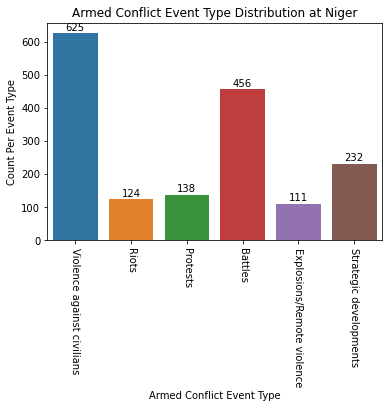

In [21]:
#import seaborn as sns
import seaborn as sns
# importing the required library
import matplotlib.pyplot as plt

#sns.barplot(list(map_dict.keys()), list(map_dict.values()))

# read a titanic.csv file
# from seaborn libraray
# df = sns.load_dataset('titanic')
# who v/s fare barplot
#events = list(map_dict_count.keys())
#values = list(map_dict_count.values())
#event_type_count = pd.DataFrame(events,values)
#sns.barplot(x = events, y = 'SentimentIndex',
#            data = event_type_count, estimator=sum)
ax=sns.barplot(list(map_dict_count.keys()), list(map_dict_count.values()))

# Show the plot
#plt.xticks(y_pos, list(map_dict_count.keys()))
plt.xlabel('Armed Conflict Event Type')
plt.ylabel('Count Per Event Type')
plt.title('Armed Conflict Event Type Distribution at Niger')
plt.setp(ax.get_xticklabels(), rotation=270)

# label each bar in barplot
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+8,  #y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center
plt.show()